## setup

In [10]:
#
# imports
#

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# visualization
from matplotlib import pyplot as plt

## model

In [7]:
model_yaml = 'COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml'
model_cfg = model_zoo.get_config_file(model_yaml)
cfg = get_cfg()
cfg.merge_from_file(model_cfg)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(model_yaml)
predictor = DefaultPredictor(cfg)

## inference

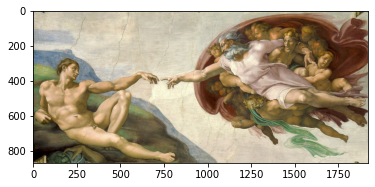

In [18]:
im = cv2.imread('res/test.jpg')
im_plt = im[:,:,::-1]
plt.figure(figsize = (30,15))
plt.imshow(im_plt)

In [50]:
outputs = predictor(im)
out_classes = outputs["instances"].pred_classes.tolist()
out_scores = outputs["instances"].scores.tolist()
print(out_classes)
print(out_scores)

[0, 0, 77, 0]
[0.9926127195358276, 0.9655225872993469, 0.7301177382469177, 0.7115382552146912]


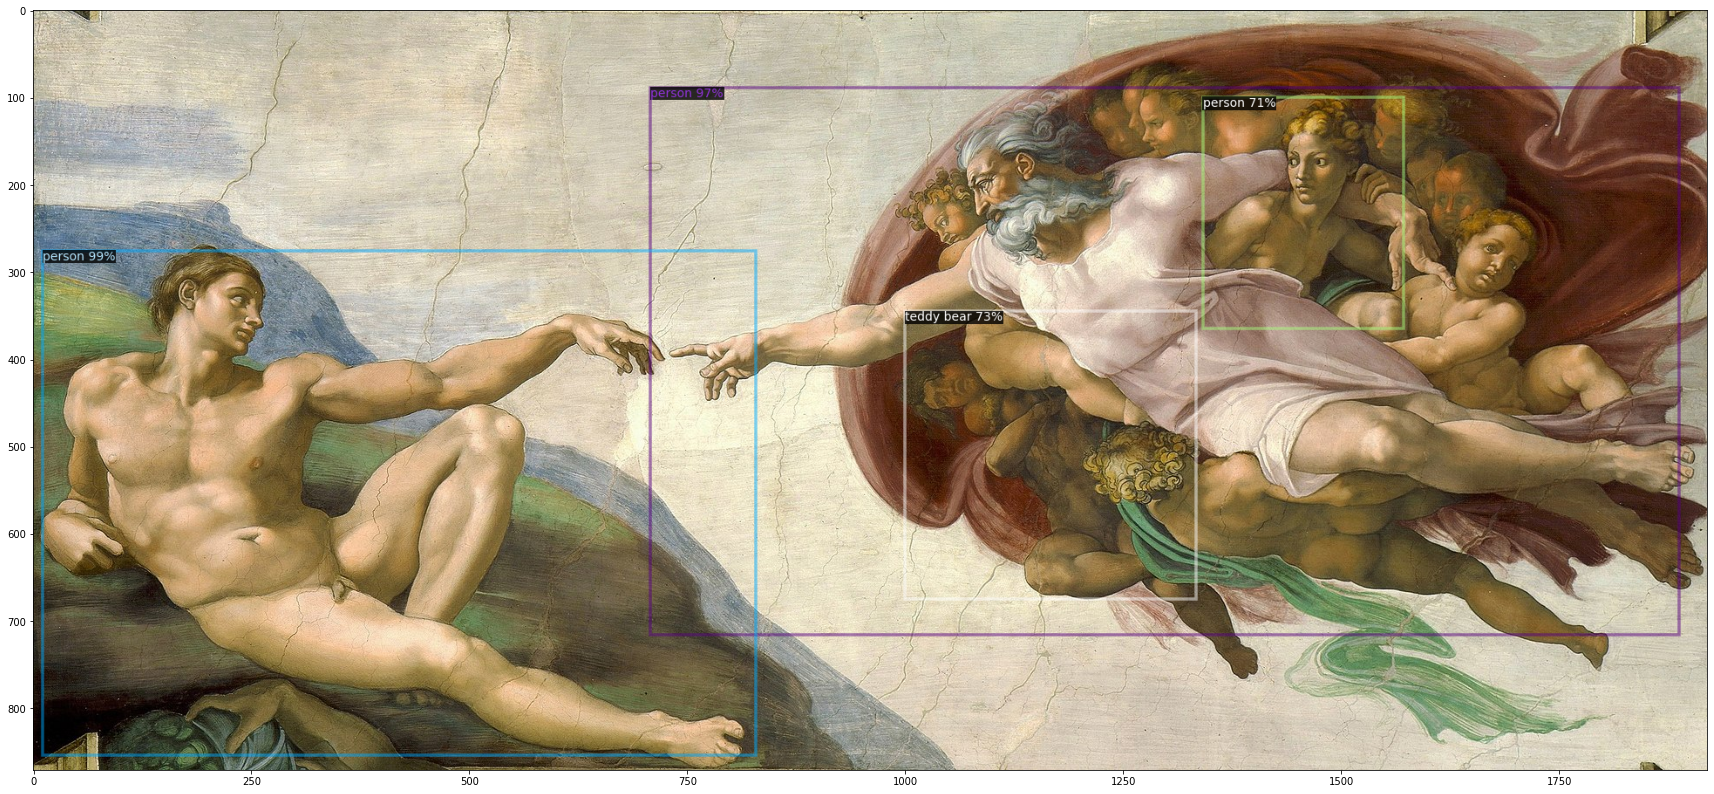

In [29]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.0)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
im_plt = v.get_image()[:, :, ::-1]
im_show = cv2.cvtColor(im_plt, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (30,15))
plt.imshow(im_show)

## data retrievel

In [34]:
MetadataCatalog.get(cfg.DATASETS.TRAIN[0])

namespace(name='coco_2017_train',
          json_file='datasets/coco/annotations/instances_train2017.json',
          image_root='datasets/coco/train2017',
          evaluator_type='coco',
          thing_dataset_id_to_contiguous_id={1: 0,
                                             2: 1,
                                             3: 2,
                                             4: 3,
                                             5: 4,
                                             6: 5,
                                             7: 6,
                                             8: 7,
                                             9: 8,
                                             10: 9,
                                             11: 10,
                                             13: 11,
                                             14: 12,
                                             15: 13,
                                             16: 14,
                                   

In [39]:
print(MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_dataset_id_to_contiguous_id)
print()
print(MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes)

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 13: 11, 14: 12, 15: 13, 16: 14, 17: 15, 18: 16, 19: 17, 20: 18, 21: 19, 22: 20, 23: 21, 24: 22, 25: 23, 27: 24, 28: 25, 31: 26, 32: 27, 33: 28, 34: 29, 35: 30, 36: 31, 37: 32, 38: 33, 39: 34, 40: 35, 41: 36, 42: 37, 43: 38, 44: 39, 46: 40, 47: 41, 48: 42, 49: 43, 50: 44, 51: 45, 52: 46, 53: 47, 54: 48, 55: 49, 56: 50, 57: 51, 58: 52, 59: 53, 60: 54, 61: 55, 62: 56, 63: 57, 64: 58, 65: 59, 67: 60, 70: 61, 72: 62, 73: 63, 74: 64, 75: 65, 76: 66, 77: 67, 78: 68, 79: 69, 80: 70, 81: 71, 82: 72, 84: 73, 85: 74, 86: 75, 87: 76, 88: 77, 89: 78, 90: 79}

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'base

In [45]:
values = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes
keys = list(range(0,80))
coco = dict(zip(keys, values))
print(coco)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

## functions

In [66]:
def get_predictor(model_yaml, score_thresh):
  model_cfg = model_zoo.get_config_file(model_yaml)
  cfg = get_cfg()
  cfg.merge_from_file(model_cfg)
  cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = score_thresh
  cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(model_yaml)
  predictor = DefaultPredictor(cfg)
  return(predictor)

def get_classdict(model_yaml):
  model_cfg = model_zoo.get_config_file(model_yaml)
  cfg = get_cfg()
  cfg.merge_from_file(model_cfg)
  values = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes
  keys = list(range(0,80))
  classdict = dict(zip(keys, values))
  return(classdict)

def get_objects(predictions, classdict):
  pred_classes = predictions["instances"].pred_classes.tolist()
  pred_classes = map(classdict.get, pred_classes)
  pred_scores = predictions["instances"].scores.tolist()
  objects = list(zip(pred_classes, pred_scores))
  return(objects)

In [68]:
model_yaml = 'COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml'
score_thresh = 0.5
predictor = get_predictor(model_yaml, score_thresh)
classdict = get_classdict(model_yaml)

In [69]:
im = cv2.imread('res/test.jpg')
pred = predictor(im)
objects = get_objects(pred, classdict)
print(objects)

[('person', 0.9926127195358276), ('person', 0.9655225872993469), ('teddy bear', 0.7301177382469177), ('person', 0.7115382552146912)]
